In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = datasets.load_boston()

c:\users\akiai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [3]:
data_pd = pd.DataFrame(data.data,columns=data.feature_names)
data_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X = data_pd["DIS"].values
Y = data.target

In [5]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [6]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=21)

In [7]:
class Perceptron:
    def __init__(self,epoch=1,learning_rate=0.01):
        self.epochs = epoch
        self.learning_rate = learning_rate
        self.w = np.random.rand(1,1)
        self.loss = []
    
    def fit(self,x_train,y_train):
        for epoch in range(1):
            for i in range(x_train.shape[0]):
                predict_train = np.matmul(x_train[i],self.w)
                error = y_train[i] - predict_train
                self.w += error * self.learning_rate * x_train[i]
                pred = np.matmul(x_train,self.w)
                loss = np.mean(np.abs(y_train-pred))
                self.loss.append(loss)
    
    def predict(self,x_test):
        y_pred = np.matmul(x_test,self.w)
        return y_pred
    
    def mean_absolute_error(self,y_test , y_pred):
        error = y_test - y_pred
        return np.mean(np.abs(error))
    
    def mean_squared_error(self,y_test,y_pred):
        error = y_test - y_pred
        return np.mean(error**2)
    
    def plot_error_rate(self):
        plt.plot(self.loss)

In [8]:
perceptron = Perceptron(learning_rate=0.0006)
perceptron.fit(X,Y)
y_pred = perceptron.predict(x_test)

In [9]:
perceptron.mean_absolute_error(y_test,y_pred)

9.21571160108331

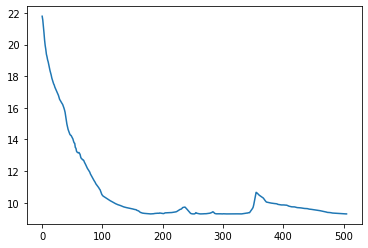

In [10]:
perceptron.plot_error_rate()